# Import Statements

In [ ]:
import pandas as pd

import numpy as np

from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import SelectFromModel
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import pickle

from scipy import stats

import seaborn as sn
import matplotlib.pyplot as plt

import io
from google.colab import files

# Loading and Cleaning the data

In [ ]:
uploaded = files.upload()

Saving dataset_CO2_emission_of_cars.csv to dataset_CO2_emission_of_cars.csv


In [ ]:
# Load and clean the data
data = pd.read_csv(io.BytesIO(uploaded['dataset.csv']))

if set(data.all()) == {True} and set(data.all(axis ='columns')) == {True}:
  print("Data is Complete")

make_dict = {}
i = 1
for unique_make in set(data['Make']):
  make_dict[unique_make] = i
  i = i + 1
  
model_dict = {}
i = 1
for unique_model in set(data['Model']):
  model_dict[unique_model] = i
  i = i + 1

vehicle_class_dict = {}
i = 1
for unique_vehicle_class in set(data['Vehicle Class']):
  vehicle_class_dict[unique_vehicle_class] = i
  i = i + 1

transmission_dict = {}
i = 1
for unique_transmission in set(data['Transmission']):
  transmission_dict[unique_transmission] = i
  i = i + 1
  
transmission_type_dict = {}
i = 1
for unique_transmission_type in set(data['Transmission Type']):
  transmission_type_dict[unique_transmission_type] = i
  i = i + 1

fuel_type_dict = {}
i = 1
for unique_fuel_type in set(data['Fuel Type']):
  fuel_type_dict[unique_fuel_type] = i
  i = i + 1

data_clean = data
data_clean['Make'] = data_clean['Make'].map(make_dict, 0)
data_clean['Model'] = data_clean['Model'].map(model_dict, 0)
data_clean['Vehicle Class'] = data_clean['Vehicle Class'].map(vehicle_class_dict, 0)
data_clean['Transmission'] = data_clean['Transmission'].map(transmission_dict, 0)
data_clean['Transmission Type'] = data_clean['Transmission Type'].map(transmission_type_dict, 0)
data_clean['Fuel Type'] = data_clean['Fuel Type'].map(fuel_type_dict, 0)

data_clean.head()

Data is Complete


,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Transmission Type,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,28,172,16,2.0,4,3,9,5,9.9,6.7,8.5,33,196
1,28,172,16,2.4,4,4,15,5,11.2,7.7,9.6,29,221
2,28,312,16,1.5,4,5,1,5,6.0,5.8,5.9,48,136
3,28,726,13,3.5,6,3,23,5,12.7,9.1,11.1,25,255
4,28,1195,13,3.5,6,3,23,5,12.1,8.7,10.6,27,244


# Feature Selection

In [ ]:
X = data_clean.drop(columns=['Make', 'Model', 'CO2 Emissions(g/km)'])
y = data_clean['CO2 Emissions(g/km)']

X.head()

,Vehicle Class,Engine Size(L),Cylinders,Transmission,Transmission Type,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg)
0,16,2.0,4,3,9,5,9.9,6.7,8.5,33
1,16,2.4,4,4,15,5,11.2,7.7,9.6,29
2,16,1.5,4,5,1,5,6.0,5.8,5.9,48
3,13,3.5,6,3,23,5,12.7,9.1,11.1,25
4,13,3.5,6,3,23,5,12.1,8.7,10.6,27


# Feature Selection Using Select From Model

In [ ]:
print('Useful Features')

m = SelectFromModel(LassoCV())

m.fit(X, y)
m.transform(X)

i = 0
for state in m.get_support():
  if state == True:
    print(f'- {list(X.columns)[i]} ')
  i = i + 1

Useful Features
- Vehicle Class 
- Engine Size(L) 
- Cylinders 
- Transmission Type 
- Fuel Type 
- Fuel Consumption City (L/100 km) 
- Fuel Consumption Hwy (L/100 km) 
- Fuel Consumption Comb (L/100 km) 
- Fuel Consumption Comb (mpg) 


# Feature Selection Using Variance

Useful Features
- Vehicle Class 
- Transmission Type 
- Fuel Consumption City (L/100 km) 
- Fuel Consumption Comb (L/100 km) 
- Fuel Consumption Comb (mpg) 


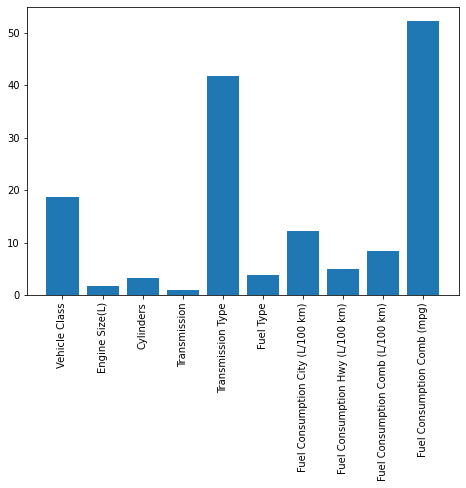

In [ ]:
print('Useful Features')

sel = VarianceThreshold(threshold=5)
sel.fit(X)
sel.transform(X)
i = 0
for state in sel.get_support():
  if state == True:
    print(f'- {list(X.columns)[i]} ')
  i = i + 1

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(list(X.columns), list(X.var()))
plt.setp(ax.get_xticklabels(), rotation='vertical')
plt.show()

# Feature Selection Using Correlation

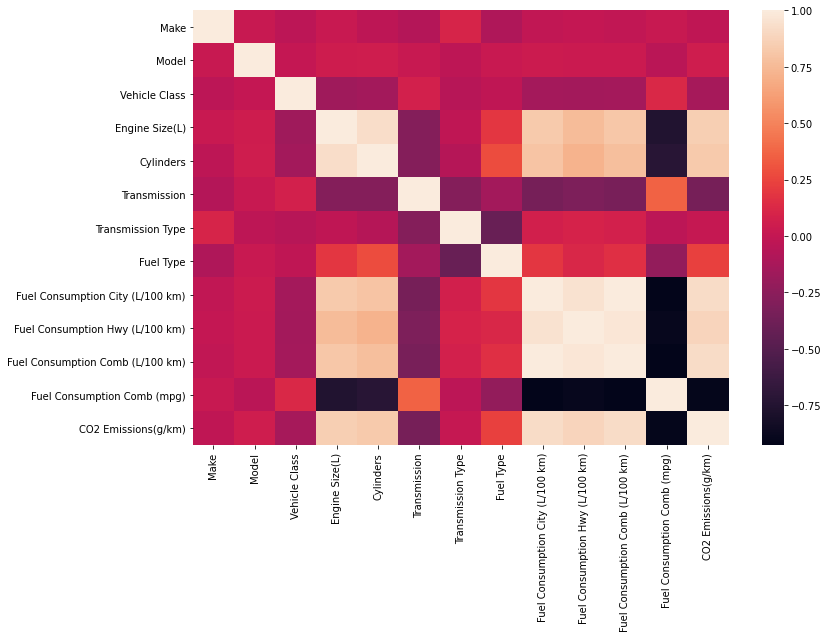

In [ ]:
fig_dims = (12, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sn.heatmap(data_clean.corr(), ax=ax)
plt.show()

In [ ]:
abs(data_clean.corr()["CO2 Emissions(g/km)"])

Make                                0.021389
Model                               0.057839
Vehicle Class                       0.131831
Engine Size(L)                      0.851145
Cylinders                           0.832644
Transmission                        0.340695
Transmission Type                   0.010576
Fuel Type                           0.238965
Fuel Consumption City (L/100 km)    0.919592
Fuel Consumption Hwy (L/100 km)     0.883536
Fuel Consumption Comb (L/100 km)    0.918052
Fuel Consumption Comb (mpg)         0.907426
CO2 Emissions(g/km)                 1.000000
Name: CO2 Emissions(g/km), dtype: float64

In [ ]:
print('Useful Features')

for feature in abs(data_clean.corr()["CO2 Emissions(g/km)"][abs(data_clean.corr()["CO2 Emissions(g/km)"])>0.5].drop('CO2 Emissions(g/km)')).index.tolist():
  print(f'- {feature}')


Useful Features
- Engine Size(L)
- Cylinders
- Fuel Consumption City (L/100 km)
- Fuel Consumption Hwy (L/100 km)
- Fuel Consumption Comb (L/100 km)
- Fuel Consumption Comb (mpg)


# Predictions

In [ ]:
# We reomved the features based in feature selection by Correlation
X = data_clean.drop(columns=['Make', 'Model', 'Vehicle Class', 'Transmission', 'Transmission Type','Fuel Type', 'CO2 Emissions(g/km)'])
y = data_clean['CO2 Emissions(g/km)']

X.head()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg)
0,2.0,4,9.9,6.7,8.5,33
1,2.4,4,11.2,7.7,9.6,29
2,1.5,4,6.0,5.8,5.9,48
3,3.5,6,12.7,9.1,11.1,25
4,3.5,6,12.1,8.7,10.6,27


# Predicting Emission Using Decision Tree Classifier


In [ ]:
model = DecisionTreeClassifier()

# train 100 times until best model is gotten
best = 0
for _ in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    model.fit(X_train, y_train)

    score = model.score(X_test, y_test)
    if score > best :
        best = score
        pickle.dump(model, open("decision_tree_model.pickle", "wb"))

predictions = model.predict(X_test)
score = accuracy_score(y_test, predictions)

print(f'Accuracy of the model - {score}')

Accuracy of the model - 0.5429925524712255


# Predicting Emission Using Linear Regression

In [ ]:
# We reomved the features based in feature selection by Correlation
X = data_clean.drop(columns=['Make', 'Model', 'Vehicle Class', 'Transmission', 'Transmission Type','Fuel Type', 'CO2 Emissions(g/km)'])
y = data_clean['CO2 Emissions(g/km)']


model = LinearRegression()

# train 100 times until best model is gotten
best = 0
for _ in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    model.fit(X_train, y_train)

    score = model.score(X_test, y_test)
    if score > best :
        best = score
        pickle.dump(model, open("linear_regression_model.pickle", "wb"))

print(f'Accuracy of the model - {best}')

Accuracy of the model - 0.9148843589592187


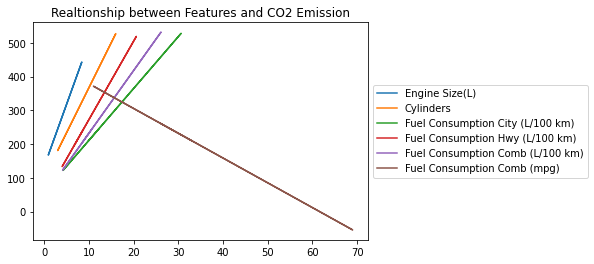

In [ ]:
for feature in list(X.columns):
  x_value = feature
  slope, intercept, r, p, std_err = stats.linregress(data[x_value], y)

  def line(x):
      return slope * x + intercept

  graph_y = list(map(line, data[x_value]))
  plt.plot(data[x_value], graph_y, label=feature)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Realtionship between Features and CO2 Emission')
plt.show()

# Predict Emission and Suggest Alternative Car


In [ ]:
def suggest_alternative_car(make, model, vehicle_class, engine_size, cylinders, transmission, transmission_type, fuel_type, FC_city,
                            FC_hwy, FC_comb_L100, FC_comb_mpg):
  # Predict the emission
  ml_model = pickle.load(open('linear_regression_model.pickle', 'rb'))
  X = [[engine_size, cylinders, FC_city, FC_hwy, FC_comb_L100, FC_comb_mpg]]
  emission = ml_model.predict(X)
  print(f'Predicted CO2 Emission(g/km) {int(emission[0])} \n')

  # loops through the dataset to find a different car that emmits less carbon
  suggest = False
  for car in data_clean.values.tolist():
    if car[0] != make and car[1] != model:
      if car[2] == vehicle_class and car[7] == fuel_type and car[5] == transmission:
        if car[12] < emission :
          suggest = True
          for c, m in make_dict.items():
            if m == car[0]:
              print(f'Make - {c}')
          for c, m in model_dict.items():
            if m == car[1]:
              print(f'Model - {c} \n')

  if suggest == False:
    print('No alternative car found, You made the right choice : )')

# Test Case
make = "ACURA"
make = make_dict.get(make, 0)
model = "ILX"
model = model_dict.get(model, 0)
vehicle_class = "COMPACT"
vehicle_class = vehicle_class_dict.get(vehicle_class, 0)
engine_size = 2
cylinders = 4 
transmission = "AS"
transmission = transmission_dict.get(transmission, 0)
transmission_type = "AS5"
transmission_type = transmission_type_dict.get(transmission, 0)
fuel_type = "Z"
fuel_type = fuel_type_dict.get(fuel_type, 0)
FC_city = 9.9            
FC_hwy = 6.7
FC_comb_L100 = 8.5
FC_comb_mpg = 33

suggest_alternative_car(make, model, vehicle_class, engine_size, cylinders, transmission, transmission_type, fuel_type, FC_city, FC_hwy, FC_comb_L100, FC_comb_mpg)

Predicted CO2 Emission(g/km) 199 

Make - INFINITI
Model - Q50 HYBRID 

Make - INFINITI
Model - Q50 HYBRID AWD 

Make - MERCEDES-BENZ
Model - CLA 250 

Make - BMW
Model - 320i SEDAN 

Make - BMW
Model - 328i SEDAN 

Make - BMW
Model - 428i COUPE 

Make - INFINITI
Model - Q50 HYBRID 

Make - INFINITI
Model - Q50 HYBRID AWD 

Make - BMW
Model - 320i 

Make - BMW
Model - 428i COUPE 

Make - INFINITI
Model - Q50 HYBRID 

Make - INFINITI
Model - Q50 HYBRID AWD 

Make - MERCEDES-BENZ
Model - CLA 250 

Make - MERCEDES-BENZ
Model - CLA 250 4MATIC FFV 

Make - MERCEDES-BENZ
Model - CLA 250 

Make - BMW
Model - 340i 

Make - BMW
Model - 440i COUPE 

Make - BMW
Model - 330i xDrive 

Make - VOLVO
Model - S60 T5 

Make - BMW
Model - 330i xDrive Sedan 

